#### Trabalho em Grupo - Estatística
# Bike Sharing

### Professora Regina Bernal
#### Alunas: Patricia Novais, Natalia do Carmo, Luciene Pizzi

Iremos trabalhar com uma base de compartilhamento de bicicletas, **Bike Sharing**, que traz diversas informações sobre:

- data
- dia da semana
- previsão do tempo
- temperatura
- sensação térmica
- umidade
- velocidade do vento
- quantidade de usuários casuais
- quantidade de usuários registrados
- quantidade total de usuários

Utilizando essa base, iremos realizar uma EDA (*exploratory data analysis*), trazendo informações sobre as variáveis, sobre suas correlações, significados e, ainda, um ajuste de **regressão linear** para criarmos previsões sobre os dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

In [2]:
sns.set_style({'axes.grid': False})
sns.set_context("talk", font_scale=1.0)

In [3]:
#lendo o arquivo
data = pd.read_csv('Bike_Sharing.csv')

In [4]:
# verificando o cabeçalho do arquivo - 5 primeiras linhas
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
list(data)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [6]:
# modificando os nomes das colunas
data.columns = ['ID', 'data', 'estacao', 'ano', 'mes', 'feriado', 'dia_semana','dia_util', 'clima_dia', 'temperatura',
 'sensacao_termica', 'umidade', 'vel_vento', 'casual_user', 'registrado_user', 'cnt_total']

In [7]:
# informações dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
ID                  731 non-null int64
data                731 non-null object
estacao             731 non-null int64
ano                 731 non-null int64
mes                 731 non-null int64
feriado             731 non-null int64
dia_semana          731 non-null int64
dia_util            731 non-null int64
clima_dia           731 non-null int64
temperatura         731 non-null float64
sensacao_termica    731 non-null float64
umidade             731 non-null float64
vel_vento           731 non-null float64
casual_user         731 non-null int64
registrado_user     731 non-null int64
cnt_total           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
# convertendo as variáveis categóricas
data1 = data.astype({'ID': 'category','estacao': 'category', 'ano': 'category', 'mes': 'category', 'feriado': 'category', 
            'dia_semana': 'category', 'dia_util': 'category', 'clima_dia': 'category'})

In [9]:
var_num = ['temperatura', 'sensacao_termica', 'umidade', 'vel_vento', 'casual_user', 'registrado_user', 'cnt_total']
var_cat = ['ID', 'estacao', 'ano', 'mes', 'feriado', 'dia_semana','dia_util', 'clima_dia']

### Análise Univariada

In [10]:
# Estatísticas básicas
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
temperatura,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
sensacao_termica,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896
umidade,731.0,0.627894,0.142429,0.000000,0.520000,0.626667,0.730209,0.972500
vel_vento,731.0,0.190486,0.077498,0.022392,0.134950,0.180975,0.233214,0.507463
casual_user,731.0,848.176471,686.622488,2.000000,315.500000,713.000000,1096.000000,3410.000000
registrado_user,731.0,3656.172367,1560.256377,20.000000,2497.000000,3662.000000,4776.500000,6946.000000
cnt_total,731.0,4504.348837,1937.211452,22.000000,3152.000000,4548.000000,5956.000000,8714.000000


In [11]:
data1[var_num].describe().T

,count,mean,std,min,25%,50%,75%,max
temperatura,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
sensacao_termica,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896
umidade,731.0,0.627894,0.142429,0.000000,0.520000,0.626667,0.730209,0.972500
vel_vento,731.0,0.190486,0.077498,0.022392,0.134950,0.180975,0.233214,0.507463
casual_user,731.0,848.176471,686.622488,2.000000,315.500000,713.000000,1096.000000,3410.000000
registrado_user,731.0,3656.172367,1560.256377,20.000000,2497.000000,3662.000000,4776.500000,6946.000000
cnt_total,731.0,4504.348837,1937.211452,22.000000,3152.000000,4548.000000,5956.000000,8714.000000


In [12]:
data1[var_cat].describe().T

,count,unique,top,freq
ID,731,731,731,1
estacao,731,4,3,188
ano,731,2,1,366
mes,731,12,12,62
feriado,731,2,0,710
dia_semana,731,7,6,105
dia_util,731,2,1,500
clima_dia,731,3,1,463


In [13]:
data1.dia_semana.unique()

[6, 0, 1, 2, 3, 4, 5]
Categories (7, int64): [6, 0, 1, 2, 3, 4, 5]

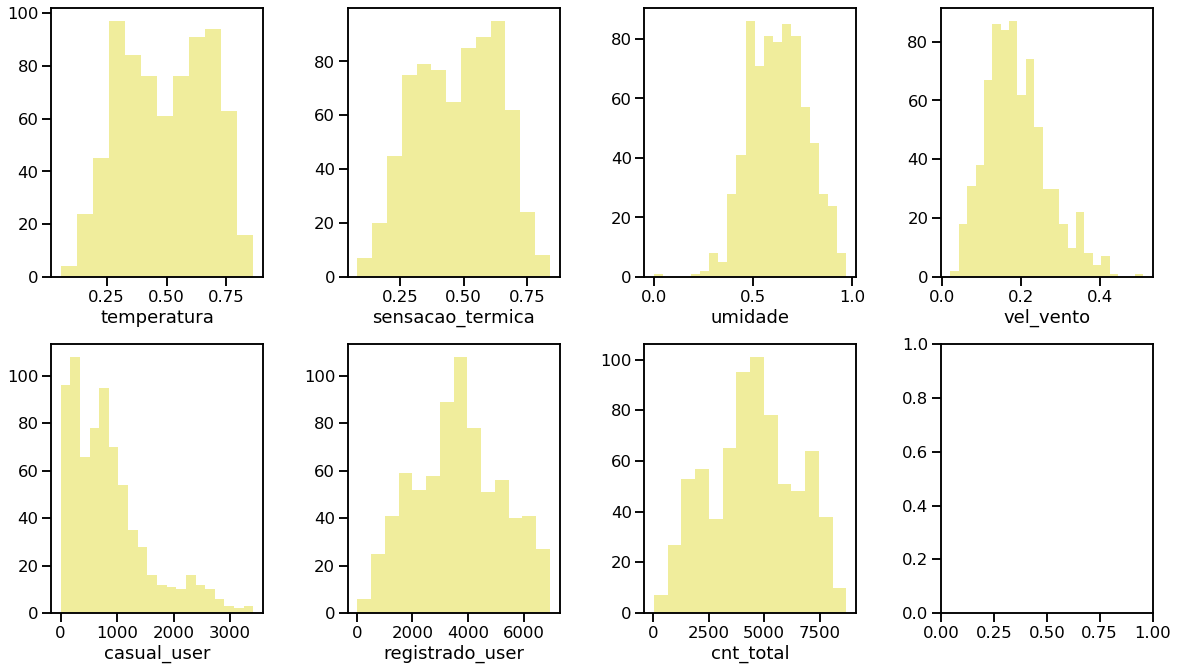

In [14]:
#Distribuição das variáveis quantitativas
features = var_num
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
for col, ax in zip(features[0:], axs.ravel()):
    x=data1.loc[:,col]
    sns.distplot(x, ax=ax, color='#dbd409', kde=False)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.4)
    
plt.savefig('distribuicao_num.png')

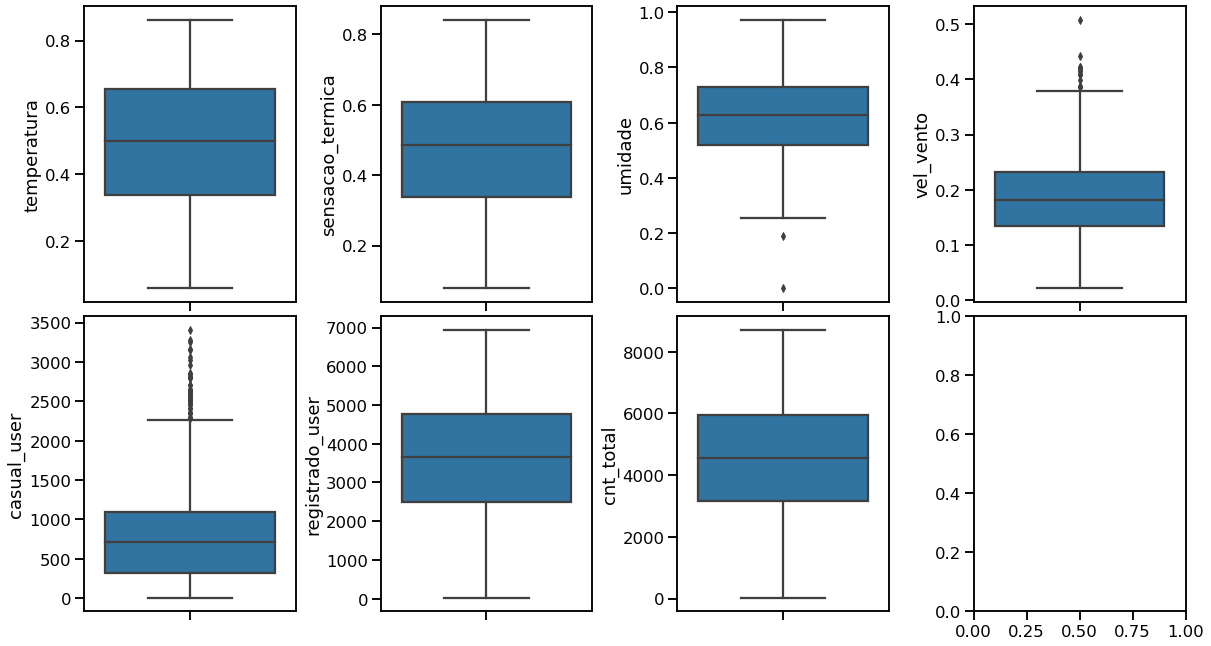

In [15]:
#Distribuição das variáveis quantitativas
features = var_num
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
for col, ax in zip(features[0:], axs.ravel()):
    x=data1.loc[:,col]
    sns.boxplot(x, ax=ax, orient='v')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.05,
                    wspace=0.4)
plt.savefig('boxplot_numericas.png')

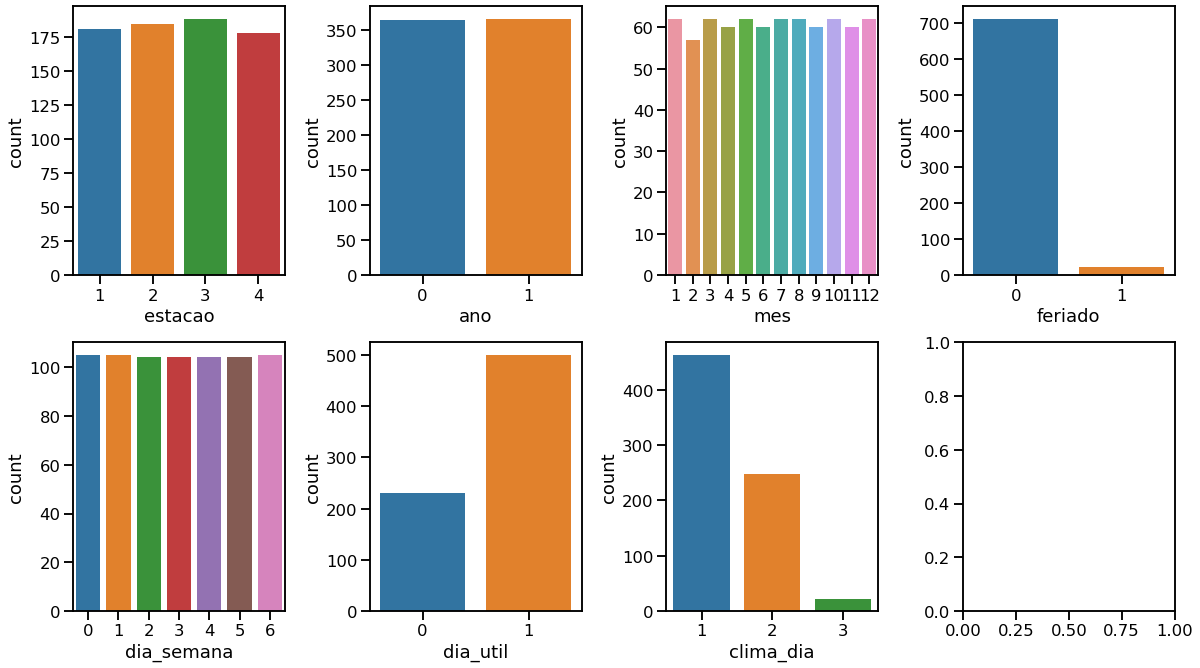

In [16]:
#Distribuição das variáveis quantitativas
features = var_cat
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
for col, ax in zip(features[1:], axs.ravel()):
    x=data1.loc[:,col]
    sns.countplot(x, ax=ax, orient='v')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.4)
plt.savefig('counplot_categoricas.png')

### Análises Bivariadas

In [17]:
# correlação entre as variáveis
corr = data.corr(method='pearson')

In [18]:
corr

,ID,estacao,ano,mes,feriado,dia_semana,dia_util,clima_dia,temperatura,sensacao_termica,umidade,vel_vento,casual_user,registrado_user,cnt_total
ID,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
estacao,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
ano,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mes,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
feriado,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
dia_semana,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
dia_util,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
clima_dia,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temperatura,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
sensacao_termica,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


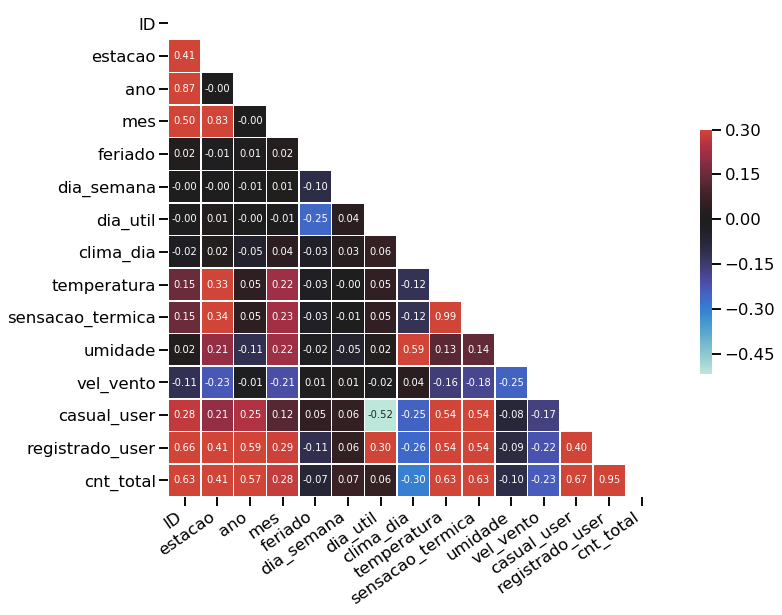

In [19]:
# visualização da correlação

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)

ax = sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, annot_kws={"size":10}, fmt='3.2f')
fig.autofmt_xdate(rotation=35)
plt.savefig('correlation_num.png')

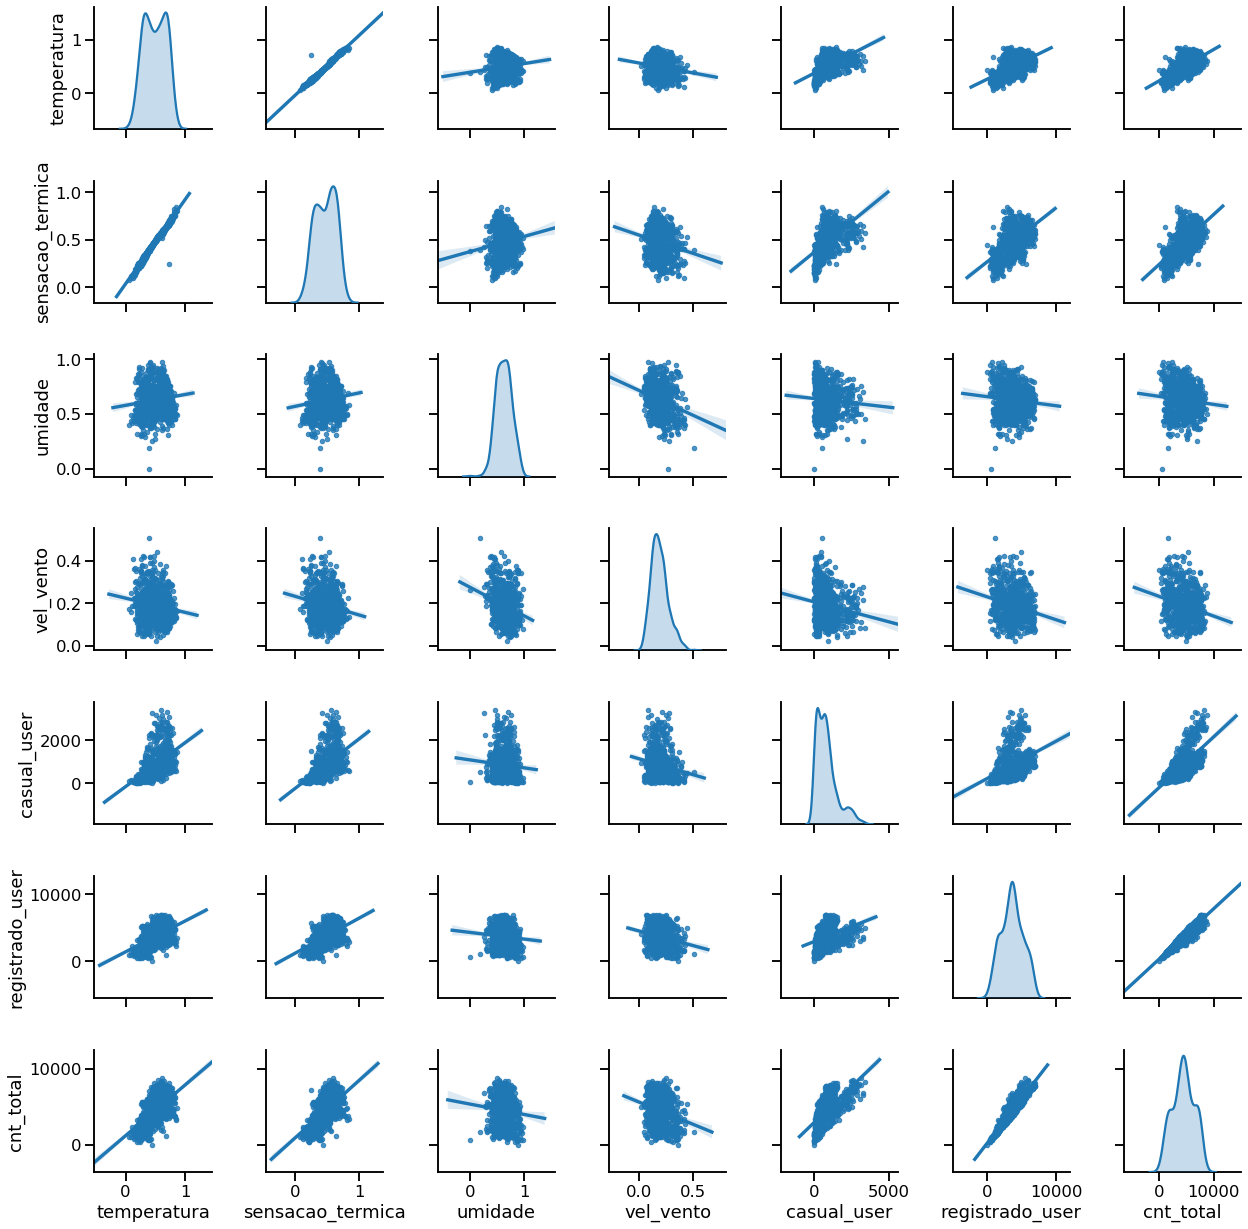

In [20]:
g = sns.pairplot(data, vars=var_num,
                 kind="reg", diag_kind="kde", markers=".", diag_kws=dict(shade=True))

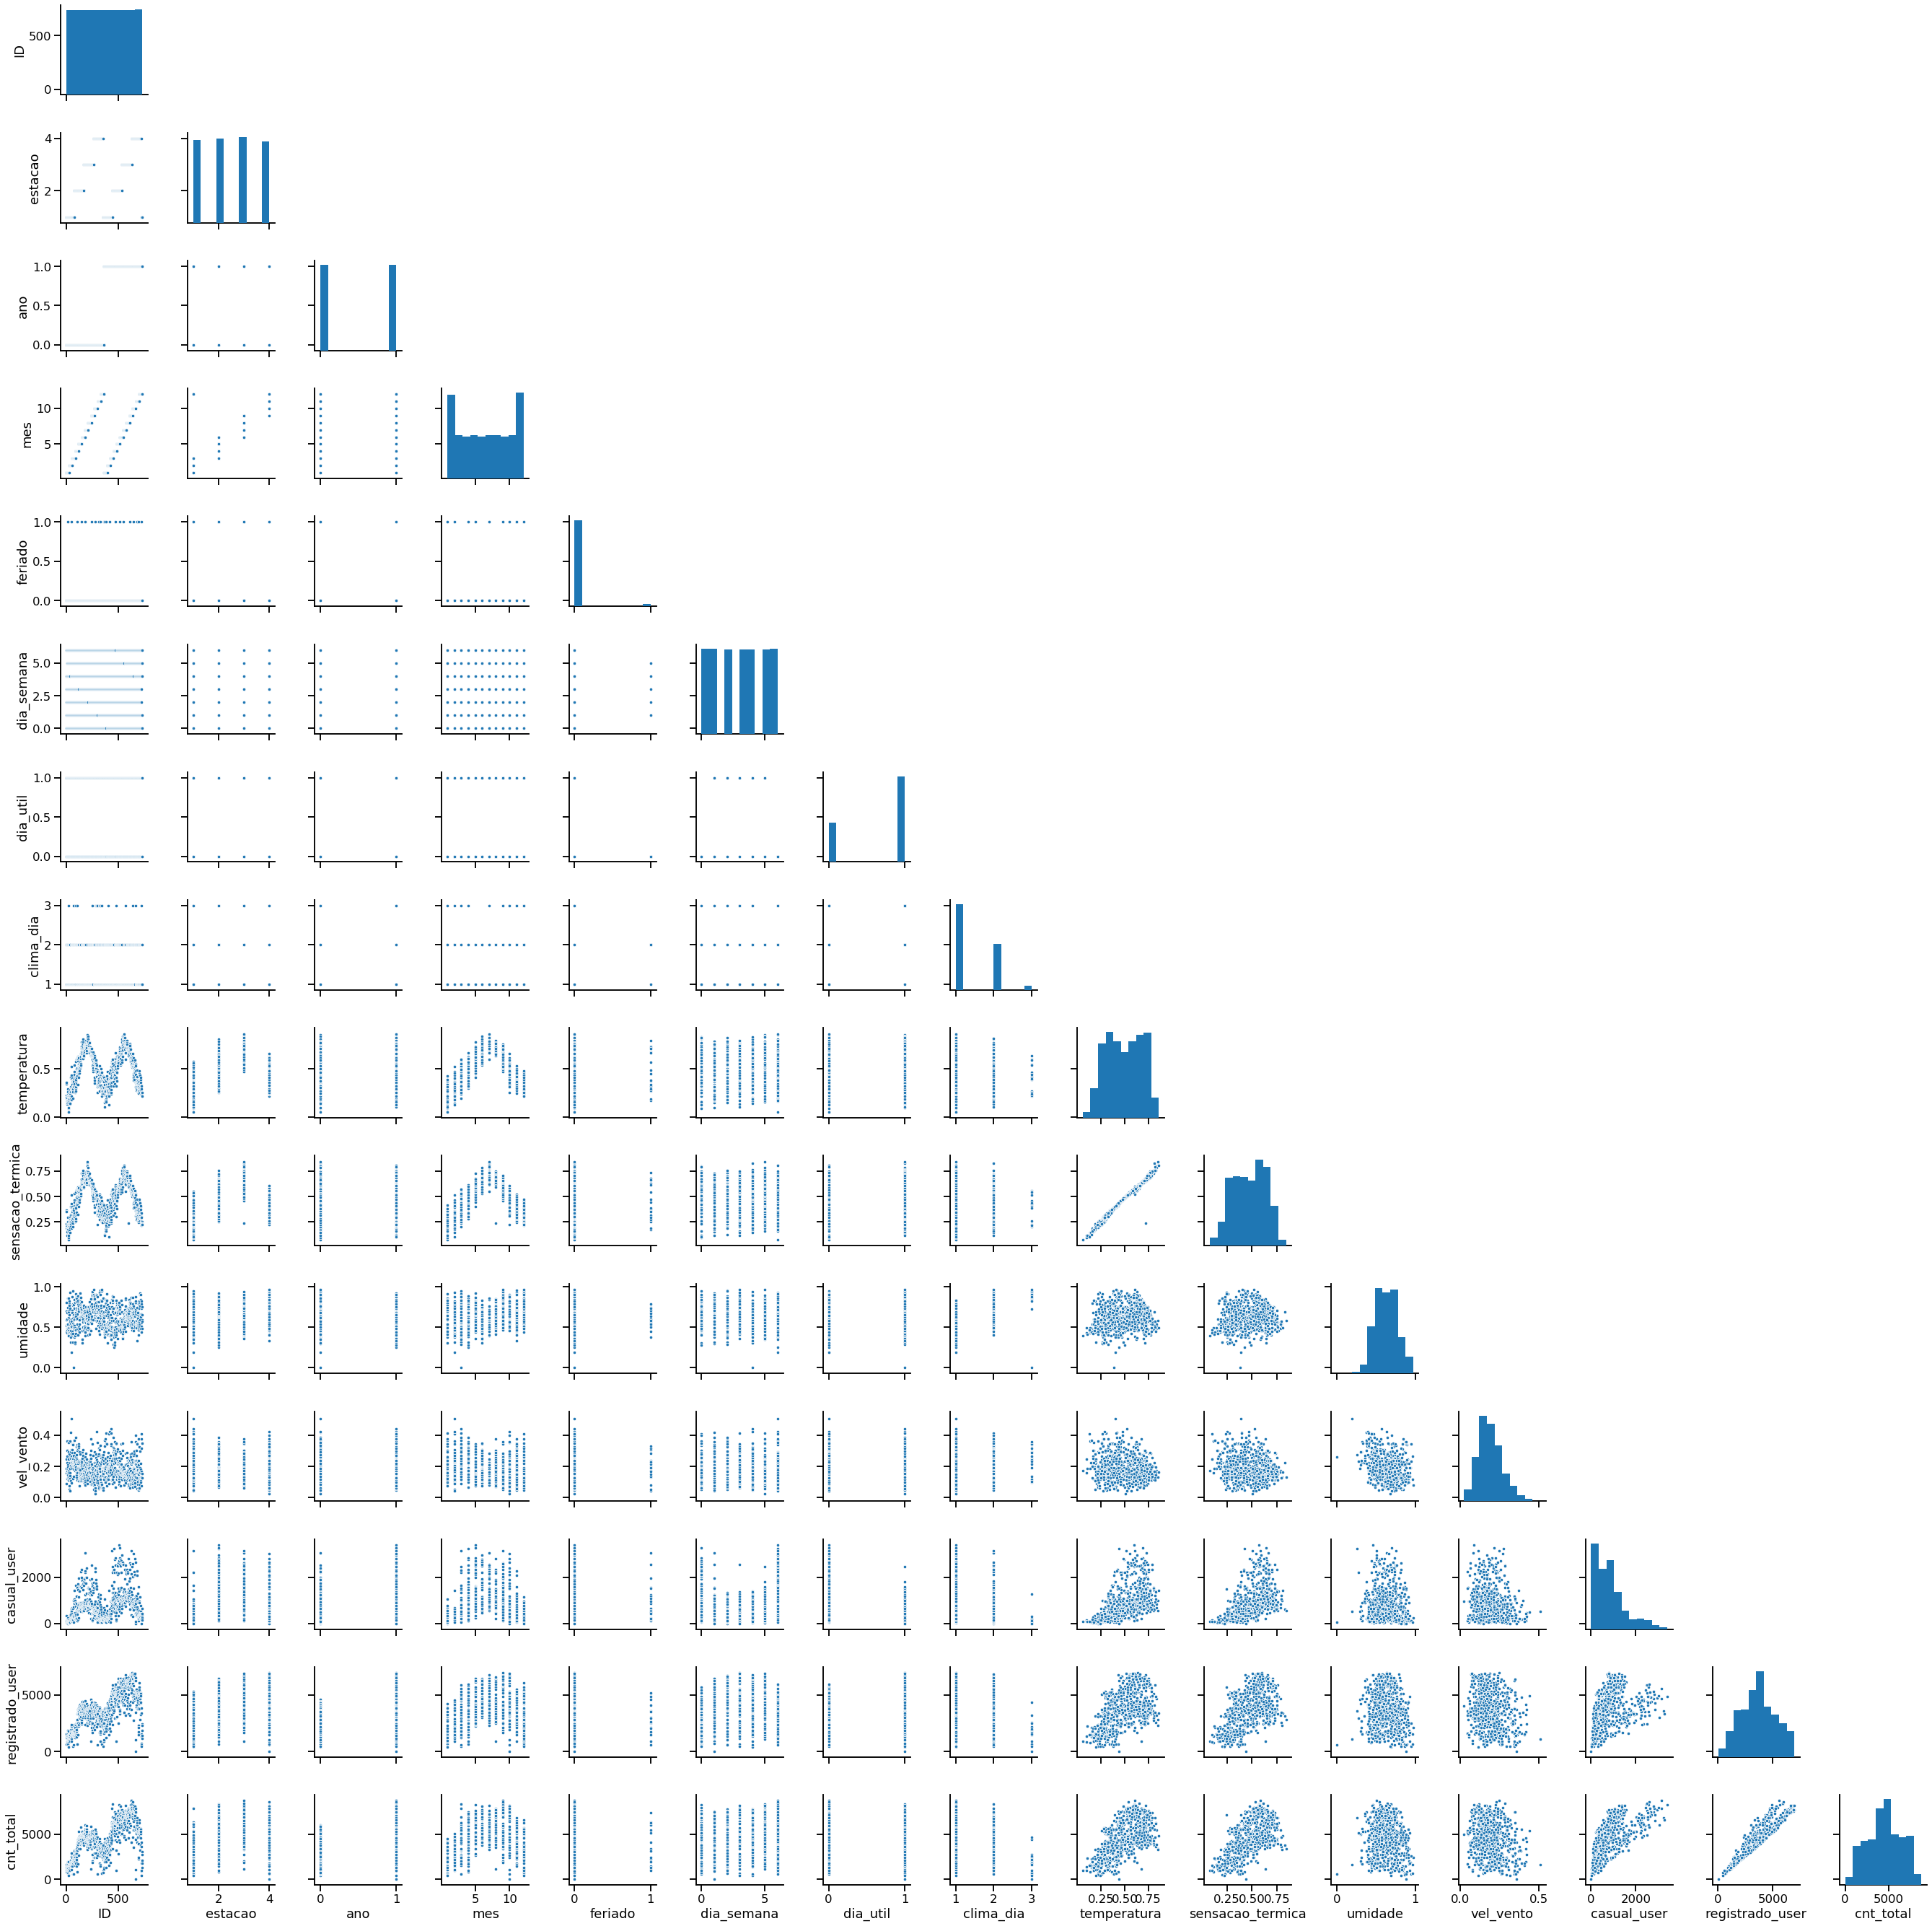

In [21]:
g = sns.pairplot(data, markers=".")
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
    
plt.savefig('paiplot_num.png')

## Regressão Linear

Dadas as análises feitas, queremos agora encontrar um ajuste que melhor descreva nossas observações.

Iremos utilizar uma regressão linear múltipla, em que a variável dependente (cnt_total) será calculada como uma combinação linear das demais variáveis (independentes)


### Separando variável dependente e independente

#### Sem selecionar as variáveis independentes

In [22]:
list(data)

['ID',
 'data',
 'estacao',
 'ano',
 'mes',
 'feriado',
 'dia_semana',
 'dia_util',
 'clima_dia',
 'temperatura',
 'sensacao_termica',
 'umidade',
 'vel_vento',
 'casual_user',
 'registrado_user',
 'cnt_total']

In [23]:
X = data[[ 'estacao','ano','mes', 'feriado', 'dia_semana', 'dia_util', 'clima_dia', 'temperatura', 'sensacao_termica',
 'umidade', 'vel_vento', 'casual_user', 'registrado_user']]

y = data[['cnt_total']]

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
# ajustando o modelo
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
model.score(X,y)

1.0

In [27]:
# obtendo os coeficientes
print('R^2: %3.2e' %model.score(X,y))
print('****')
print('Intercepto: %3.2e' %model.intercept_)
print('****')
for i,j in zip(X.columns,np.arange(13)):
    print('%s: %3.2e' %(i.capitalize(),model.coef_[0][j]))

R^2: 1.00e+00
****
Intercepto: -1.82e-12
****
Estacao: -2.56e-13
Ano: -1.91e-12
Mes: 1.25e-13
Feriado: 1.13e-13
Dia_semana: -6.62e-14
Dia_util: -1.20e-12
Clima_dia: 4.28e-13
Temperatura: 1.68e-12
Sensacao_termica: -2.82e-12
Umidade: 4.95e-14
Vel_vento: 6.79e-13
Casual_user: 1.00e+00
Registrado_user: 1.00e+00


In [28]:
import statsmodels.api as sm
from scipy import stats


X_ = sm.add_constant(X)
est = sm.OLS(y, X_)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              cnt_total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.273e+31
Date:                Fri, 03 Jul 2020   Prob (F-statistic):               0.00
Time:                        10:35:11   Log-Likelihood:                 18354.
No. Observations:                 731   AIC:                        -3.668e+04
Df Residuals:                     717   BIC:                        -3.662e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.276e-12   8.66e-13  

C:\Users\p135894\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Selecionando as variáveis

Como visto acima, as variáveis *Casual_user* e *Registrado_user* criam um grande viés nos ajustes. Assim, iremos fazer o ajuste linear sem essas variáveis.

In [29]:
X2 = data[[ 'estacao','ano','mes', 'feriado', 'dia_semana', 'dia_util', 'clima_dia', 'temperatura', 'sensacao_termica',
 'umidade', 'vel_vento']]

y2 = data[['cnt_total']]

In [30]:
model2 = LinearRegression()

In [31]:
# ajustando o modelo
model2.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
model2.score(X2,y2)

0.8002441102343252

In [33]:
# obtendo os coeficientes
print('R^2: %3.2f' %model2.score(X2,y2))
print('****')
print('Intercepto: %3.2f' %model2.intercept_)
print('****')
for i,j in zip(X2.columns,np.arange(11)):
    print('%s: %3.2f' %(i.capitalize(),model2.coef_[0][j]))

R^2: 0.80
****
Intercepto: 1469.00
****
Estacao: 509.78
Ano: 2040.70
Mes: -38.98
Feriado: -518.99
Dia_semana: 69.06
Dia_util: 120.36
Clima_dia: -610.99
Temperatura: 2028.92
Sensacao_termica: 3573.27
Umidade: -1018.86
Vel_vento: -2557.57


In [34]:
import statsmodels.api as sm
from scipy import stats


X_2 = sm.add_constant(X2)
est = sm.OLS(y2, X_2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              cnt_total   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     261.9
Date:                Fri, 03 Jul 2020   Prob (F-statistic):          7.80e-243
Time:                        10:35:11   Log-Likelihood:                -5981.0
No. Observations:                 731   AIC:                         1.199e+04
Df Residuals:                     719   BIC:                         1.204e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1469.0031    240.218  

C:\Users\p135894\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### 2a retirada de variáveis

Como visto acima, a variável *Temperatura* tem um p-value alto, indicando baixa significância. Dado isso, iremos realizar o ajuste sem essa variável.

In [35]:
X3 = data[[ 'estacao','ano','mes', 'feriado', 'dia_semana', 'dia_util', 'clima_dia','sensacao_termica', 'umidade', 'vel_vento']]

y3 = data[['cnt_total']]

In [36]:
model3 = LinearRegression()

In [37]:
# ajustando o modelo
model3.fit(X3,y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
model3.score(X3,y3)

0.7996636553054942

In [39]:
# obtendo os coeficientes
print('R^2: %3.2f' %model3.score(X3,y3))
print('****')
print('Intercepto: %3.2f' %model3.intercept_)
print('****')
for i,j in zip(X3.columns,np.arange(10)):
    print('%s: %3.2f' %(i.capitalize(),model3.coef_[0][j]))

R^2: 0.80
****
Intercepto: 1380.46
****
Estacao: 509.20
Ano: 2041.46
Mes: -38.87
Feriado: -508.06
Dia_semana: 70.32
Dia_util: 121.89
Clima_dia: -607.15
Sensacao_termica: 5848.48
Umidade: -1044.73
Vel_vento: -2450.02


In [40]:
import statsmodels.api as sm
from scipy import stats


X_3 = sm.add_constant(X3)
est = sm.OLS(y3, X_3)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              cnt_total   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     287.4
Date:                Fri, 03 Jul 2020   Prob (F-statistic):          1.27e-243
Time:                        10:35:11   Log-Likelihood:                -5982.1
No. Observations:                 731   AIC:                         1.199e+04
Df Residuals:                     720   BIC:                         1.204e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1380.4615    232.452  

C:\Users\p135894\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Resíduos

Para o cálculo de Resíduos, utilizaremos o último modelo ajustado.

In [41]:
y_pred = model3.predict(X3)

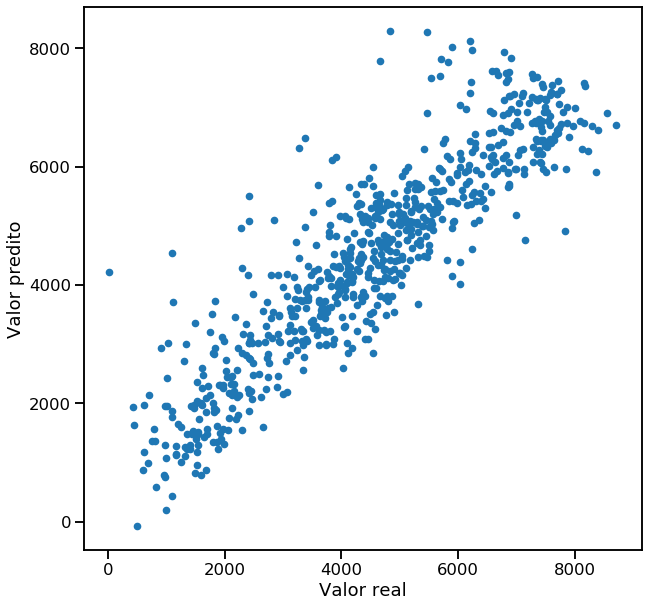

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(y3,y_pred, marker='.', s=150)
plt.xlabel('Valor real')
plt.ylabel('Valor predito')
plt.savefig('predito_real.png')

In [43]:
# Erro Quadrático Médio
mse = np.sum((y_pred - y3)**2)

#  Raiz do Erro Quadrático Médio
# m is the number of training examples
rmse = np.sqrt(mse/len(X))

print('MSE: %3.2f' %mse)
print('RMSE: %3.2f' %rmse)

MSE: 548828506.60
RMSE: 866.48


In [44]:
# Soma do quadrado dos resíduos
ssr = np.sum((y_pred - y3)**2)

# Soma total dos quadrados
sst = np.sum((y3 - np.mean(y3))**2)

# R2 score
r2_score = 1 - (ssr/sst)

print('O Resíduo (R2) é %3.2f' %r2_score)

O Resíduo (R2) é 0.80


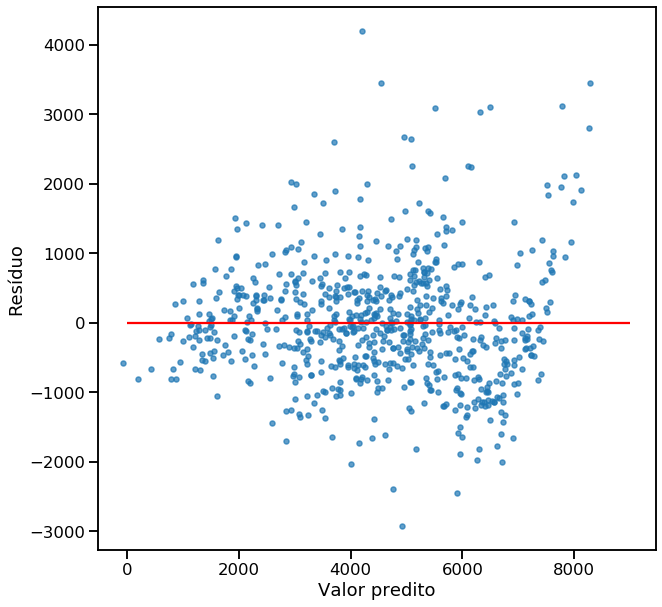

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred,y_pred-y3, marker='.', s=100, alpha=0.7)
plt.xlabel('Valor predito')
plt.ylabel('Resíduo')
plt.hlines(y=0, xmin=0, xmax=9000, colors='red')

In [46]:
residuo = y_pred - y3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018CB0518E80>]],
      dtype=object)

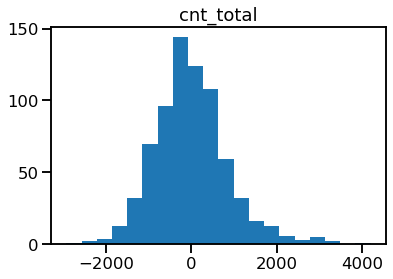

In [47]:
residuo.hist(bins=20, grid=False)

### Teste de Shapiro-Wilk

In [48]:
from scipy import stats

In [49]:
shapiro_test = stats.shapiro(residuo)
shapiro_test

(0.9672043323516846, 9.872835188273754e-12)

In [50]:
print('O Teste de Shapiro-Wilk possui W = %3.2f e p-value=%3.2e.' %(shapiro_test[0],shapiro_test[1]))
print('Portanto, dado que p-value << alpha, rejeitamos a hipótese nula. O resíduo não é Gaussiano.')

O Teste de Shapiro-Wilk possui W = 0.97 e p-value=9.87e-12.
Portanto, dado que p-value << alpha, rejeitamos a hipótese nula. O resíduo não é Gaussiano.
